In [25]:
# WINE QUALITY CLASSIFICATION PROJECT
# 1. IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [26]:
# 2. LOAD AND EXPLORE THE DATASET

wine = pd.read_csv(r"C:\Users\Ahsan\Downloads\archive (1)\WineQT.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [27]:
wine.shape

(1143, 13)

In [28]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [29]:
# Find missing values

In [30]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [31]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


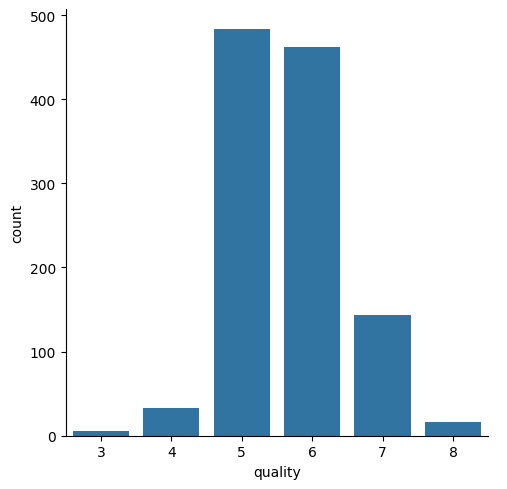

In [32]:
# number of vales for each quality
sns.catplot(x='quality' , data=wine , kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

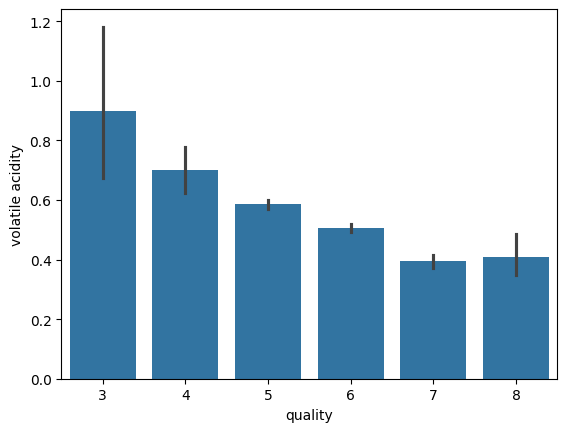

In [33]:
#volatile acidity vs qua
plot = plt.Figure(figsize=(5,5))
sns.barplot(x = 'quality' , y='volatile acidity' , data=wine)

<Axes: xlabel='quality', ylabel='citric acid'>

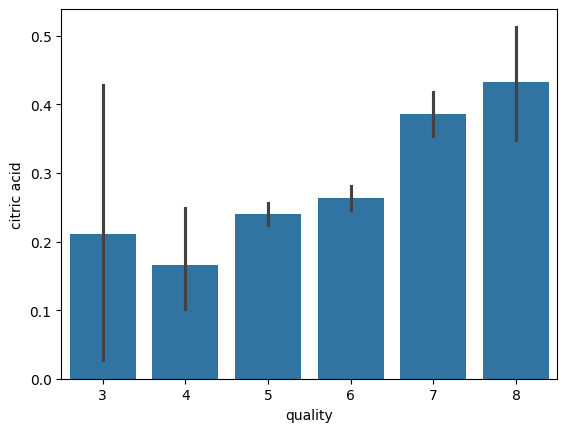

In [34]:
#citric acid vs qua
plot = plt.Figure(figsize=(5,5))
sns.barplot(x = 'quality' , y='citric acid' , data=wine)

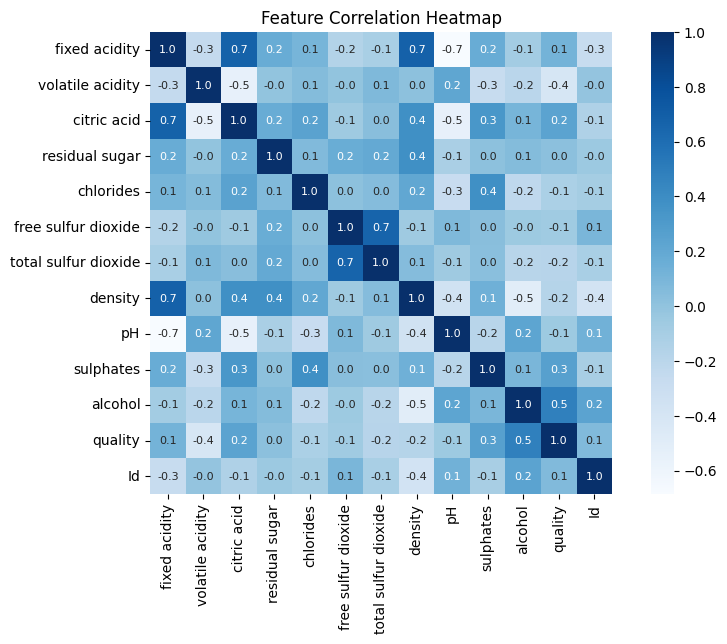

In [35]:
# corelation

plt.figure(figsize=(10, 6))
sns.heatmap(wine.corr(),cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size': 8},cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

In [36]:
# STRATIFIED TRAIN-TEST SPLIT BASED ON TARGET COLUMN

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(wine, wine["quality"]):
    strat_train_set = wine.loc[train_idx]
    strat_test_set = wine.loc[test_idx]

In [37]:
# SEPARATE FEATURES & TARGET

X_train = strat_train_set.drop("quality", axis=1)
y_train = strat_train_set["quality"]
X_test = strat_test_set.drop("quality", axis=1)
y_test = strat_test_set["quality"]

In [38]:
#  PREPROCESSING PIPELINE

preprocessing_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

X_train_prepared = preprocessing_pipeline.fit_transform(X_train)
X_test_prepared = preprocessing_pipeline.transform(X_test)


In [39]:
#  MODEL DEFINITIONS & PARAMS

model_params = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [None, 10, 20]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.1, 1, 10]
        }
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"]
        }
    },
    "SVC": {
        "model": SVC(),
        "params": {
            "C": [0.5, 1, 10],
            "kernel": ["linear", "rbf"]
        }
    }
}


In [40]:
# GRID SEARCH TRAINING & SELECTION
best_models = {}
model_scores = {}

for name, mp in model_params.items():
    print(f"\nTraining and tuning {name}...")
    clf = GridSearchCV(mp["model"], mp["params"], cv=5)
    clf.fit(X_train_prepared, y_train)
    best_models[name] = clf
    model_scores[name] = clf.best_score_
    print(f"Best Score: {clf.best_score_:.4f}")
    print(f"Best Params: {clf.best_params_}")


Training and tuning RandomForest...
Best Score: 0.6378
Best Params: {'max_depth': 10, 'n_estimators': 50}

Training and tuning LogisticRegression...
Best Score: 0.5887
Best Params: {'C': 1}

Training and tuning DecisionTree...
Best Score: 0.5405
Best Params: {'max_depth': 20, 'min_samples_split': 2}

Training and tuning KNN...
Best Score: 0.5985
Best Params: {'n_neighbors': 7, 'weights': 'distance'}

Training and tuning SVC...
Best Score: 0.6105
Best Params: {'C': 1, 'kernel': 'rbf'}


In [41]:
# EVALUATE BEST MODEL ON TEST DATA

best_model_name = max(model_scores, key=model_scores.get)
best_model = best_models[best_model_name]

print(f"\nBest Model Based on CV Accuracy: {best_model_name}")

final_predictions = best_model.predict(X_test_prepared)
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"Test Accuracy for {best_model_name}: {final_accuracy:.4f}\n")



Best Model Based on CV Accuracy: RandomForest
Test Accuracy for RandomForest: 0.6856



In [42]:
#CLASSIFICATION REPORT

print("Classification Report:")
print(classification_report(y_test, final_predictions))


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.72      0.78      0.75        97
           6       0.64      0.72      0.68        92
           7       0.71      0.52      0.60        29
           8       0.00      0.00      0.00         3

    accuracy                           0.69       229
   macro avg       0.35      0.34      0.34       229
weighted avg       0.65      0.69      0.67       229



C:\Users\Ahsan\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ahsan\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ahsan\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [43]:
# ACTUAL VS PREDICTED
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": final_predictions
})
print("\nActual vs Predicted Samples:")
print(comparison_df.head(20))


Actual vs Predicted Samples:
    Actual  Predicted
0        6          6
1        5          5
2        5          5
3        5          5
4        5          5
5        6          6
6        6          6
7        6          6
8        6          6
9        4          5
10       5          5
11       5          5
12       7          6
13       6          6
14       7          7
15       5          5
16       5          5
17       6          6
18       5          6
19       5          5


In [44]:
#  LABEL GOOD & BAD QUALITY WINE
comparison_df["Quality Label"] = np.where(comparison_df["Actual"] >= 6, "Good", "Bad")
comparison_df["Prediction Label"] = np.where(comparison_df["Predicted"] >= 6, "Good", "Bad")

print("\nSample of Quality Classification:")
print(comparison_df.sample(10))



Sample of Quality Classification:
     Actual  Predicted Quality Label Prediction Label
147       5          5           Bad              Bad
85        6          6          Good             Good
52        5          6           Bad             Good
153       8          6          Good             Good
154       7          7          Good             Good
137       5          5           Bad              Bad
30        7          7          Good             Good
49        4          6           Bad             Good
118       6          5          Good              Bad
173       5          5           Bad              Bad


In [45]:
# FINAL SUMMARY
print("\nSummary:")
print(f"Best Classifier: {best_model_name}")
print(f"Final Test Accuracy: {final_accuracy:.4f}")



Summary:
Best Classifier: RandomForest
Final Test Accuracy: 0.6856


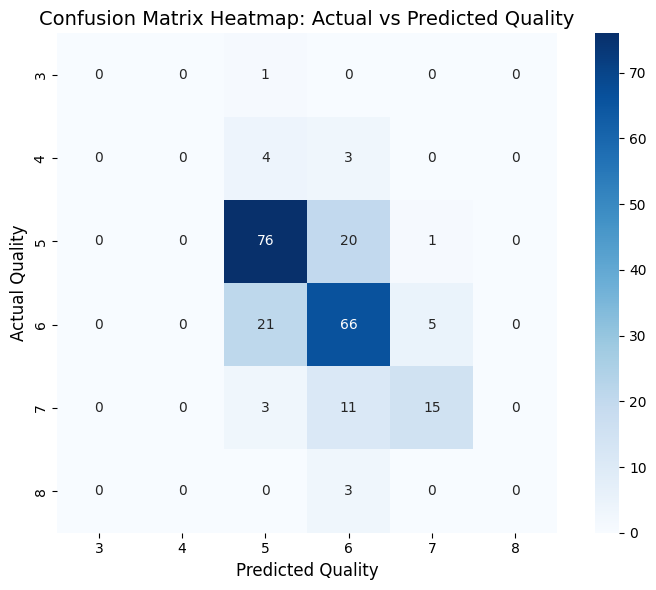

In [46]:
# ACTUAL vs PREDICTED HEATMAP
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, final_predictions, labels=sorted(wine["quality"].unique()))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(wine["quality"].unique()), 
            yticklabels=sorted(wine["quality"].unique()),
            cbar=True, square=True, annot_kws={'size': 10})

plt.title("Confusion Matrix Heatmap: Actual vs Predicted Quality", fontsize=14)
plt.xlabel("Predicted Quality", fontsize=12)
plt.ylabel("Actual Quality", fontsize=12)
plt.tight_layout()
plt.show()



In [47]:
# Save model
import joblib
joblib.dump(best_model, "final_wine_quality_model.pkl")


['final_wine_quality_model.pkl']